 # K-Nearest Neighbors Regression for random dataset

The K-Neighbors Classifier (also known as K-Nearest Neighbors or KNN) is a supervised machine learning algorithm used for classification tasks. It classifies new data points based on the similarity (or distance) to its nearest "neighbors" in the feature space.

**Steps in K Neighbors Classify for a random generate dataset:**

- Generate a Dataset: The make_classification function generates a random classification dataset. You can adjust parameters like the number of samples (n_samples), features (n_features), and classes (n_classes).

- Split the Data: The dataset is split into training and testing sets using train_test_split to ensure the model is tested on unseen data.

- Train the Model: A KNeighborsClassifier with 3 neighbors (n_neighbors=3) is created and trained using the fit() method on the training data.

- Prediction and Evaluation: The model is used to predict the labels for the test set, and the accuracy of the model is calculated using accuracy_score.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from ipywidgets import interact, IntSlider
import ipywidgets as widgets

<Axes: >

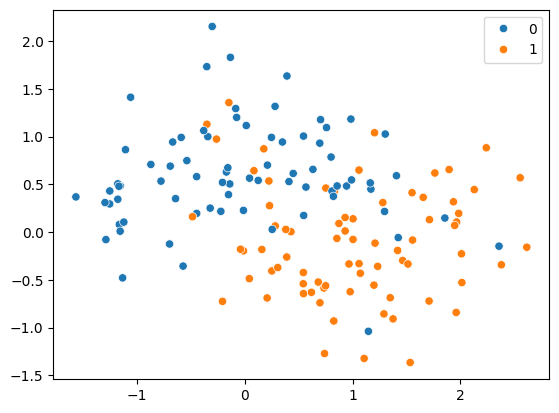

In [ ]:
# Generate a two-dimensional dataset
X, y = make_moons(n_samples=150, noise=0.45, random_state=30)

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue = y)

## KNeighborsClassifier

In [ ]:
# Function to plot dataset and classification boundary
def plot_knn(n_neighbors):
    # Create a KNN classifier with the specified number of neighbors
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X, y)  # Train the classifier on the provided dataset

    # Create a mesh grid for plotting the decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    # Predict the class for each point in the mesh grid
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plotting the decision boundary
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3)  # Plot the contour based on class predictions
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='k')  # Scatter plot of actual data points
    plt.title(f'K-Nearest Neighbors with n_neighbors = {n_neighbors}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

    # Predictions for the provided data and compute the confusion matrix
    predictions = knn.predict(X)
    cm = confusion_matrix(y, predictions)

    # Display the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
    disp.plot(cmap=plt.cm.Blues)
    print(classification_report(y, predictions))  # Print the classification report

    plt.show()

# Interactive widget to change the number of neighbors dynamically
interact(plot_knn, n_neighbors=IntSlider(min=1, max=15, step=1, value=6))


interactive(children=(IntSlider(value=6, description='n_neighbors', max=15, min=1), Output()), _dom_classes=('…

<function __main__.plot_knn(n_neighbors)>


This  demonstrates the implementation of a K-Nearest Neighbors (KNN) classifier using a synthetic dataset. It allows interactive exploration of how changing the `n_neighbors` parameter impacts the model's decision boundary and classification metrics.

#### Key Components:

- **KNN Classifier Configuration**: The classifier is set up with a variable number of neighbors, allowing for exploration of how this parameter influences the model's ability to generalize over the training data. [Detailed Documentation ](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
- **Decision Boundary Visualization**: A mesh grid is used to visualize the decision boundary, offering intuitive understanding of how the KNN algorithm segments the feature space into different classes based on the nearest training examples.
- **Real-Time Interactivity**: Includes an interactive slider to change the number of neighbors dynamically, providing immediate visual feedback on how this affects the classifier's behavior.
- **Classification Metrics**: Outputs a classification report and confusion matrix, providing detailed metrics on the classifier's performance, including accuracy, precision, recall, and F1-score for each class.


## KNeighborsRegressor

In [ ]:
# Import necessary libraries for data handling, machine learning, and plotting
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
from ipywidgets import interact, IntSlider
import ipywidgets as widgets

# Generate a synthetic regression dataset
X, y = make_regression(n_samples=120, n_features=1, noise=17, random_state=38)


In [ ]:
# Function to plot dataset and regression line
def plot_knn_regression(n_neighbors):
    # Initialize a KNN regressor with a specific number of neighbors
    knn = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn.fit(X, y)  # Fit the model on the provided dataset

    # Create a linear space of values for X to predict over for plotting
    x_range = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)

    # Predict the target values using the fitted model for the generated X values
    y_pred = knn.predict(x_range)

    # Begin plotting
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', label='Data Points')  # Plot actual data points
    plt.plot(x_range, y_pred, color='red', label='KNN Regression Line')  # Plot the predicted regression line
    plt.title(f'K-Nearest Neighbors Regression with n_neighbors = {n_neighbors}')
    plt.xlabel('Feature Value')
    plt.ylabel('Target Value')
    plt.legend()
    plt.show()

# Setup an interactive widget to change the number of neighbors dynamically
interact(plot_knn_regression, n_neighbors=IntSlider(min=1, max=40, step=1, value=6))

interactive(children=(IntSlider(value=6, description='n_neighbors', max=40, min=1), Output()), _dom_classes=('…

<function __main__.plot_knn_regression(n_neighbors)>

This demonstrates the use of the K-Nearest Neighbors (KNN) algorithm for regression tasks using a synthetic dataset. An interactive slider allows users to adjust the number of neighbors used in the model, providing insights into how this parameter affects the regression results.

#### Functions and Methods Used:

- **`make_regression()`:** Part of `sklearn.datasets`, this function generates a synthetic regression dataset. Parameters such as `n_samples`, `n_features`, and `noise` control the size, dimensionality, and noise level of the dataset respectively.

- **`KNeighborsRegressor()`:** A regression model from `sklearn.neighbors` that implements the KNN algorithm. The model predicts the target by averaging the values of the nearest neighbors. [Detailed Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)

- **`fit()`:** This method trains the KNN model on the dataset (`X`, `y`). It stores the training data and uses it during the prediction phase.

- **`predict()`:** Used to predict the target values for the given input samples using the trained KNN model. Essential for generating the regression line over a range of input values.

- **`interact()`:** A function from `ipywidgets` that creates interactive UI elements for the notebook. It's used here to dynamically adjust the number of neighbors in the KNN model.

- **`IntSlider()`:** Creates a slider widget, allowing for the interactive selection of integer values. This widget is used to control the `n_neighbors` parameter in the KNN model.


## How to choose the best K

In [ ]:
# Import necessary libraries
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from matplotlib.ticker import MaxNLocator  # For ensuring x-axis values are integers

# Generate synthetic data suitable for regression analysis
X, y = make_regression(n_samples=300, n_features=1, noise=28, random_state=40)

# Split the data into training and testing sets to facilitate model validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)

# Define a range of K values to test
k_values = range(1, 21)

# Initialize a DataFrame to store the results of each K
results = pd.DataFrame(columns=['K', 'MSE'])

# Loop over the defined range of K values
for k in k_values:
    # Initialize the KNN regressor with the current K value
    knn = KNeighborsRegressor(n_neighbors=k)
    # Train the KNN regressor using the training data
    knn.fit(X_train, y_train)
    # Predict the target values for the test set
    y_pred = knn.predict(X_test)
    # Calculate the MSE for the current K
    mse = mean_squared_error(y_test, y_pred)
    # Store the results in the DataFrame
    results = pd.concat([results, pd.DataFrame({'K': [k], 'MSE': [mse]})], ignore_index=True)

results

,K,MSE
0,1,1349.966806
1,2,1067.354808
2,3,1030.456640
3,4,944.592547
4,5,883.620412
5,6,826.558521
6,7,813.852488
7,8,828.088228
8,9,777.522138
9,10,778.639251


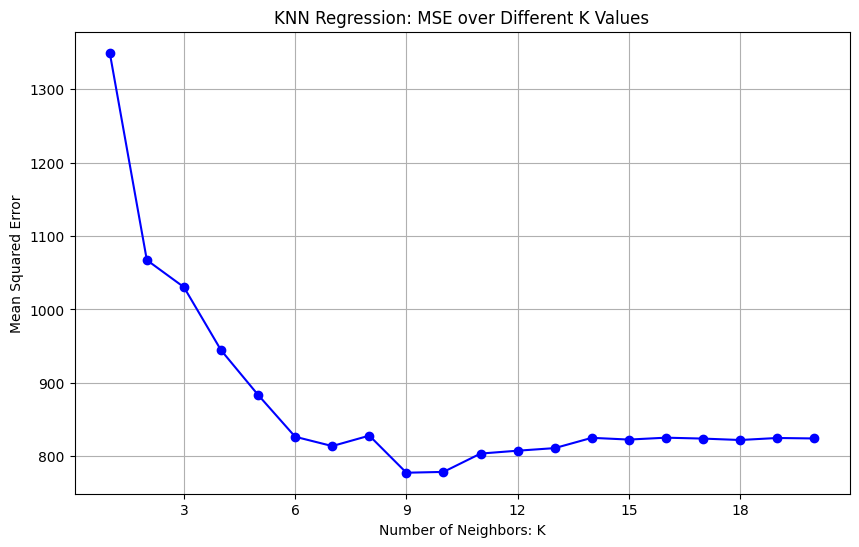

In [ ]:
# Create a plot to visualize the results
plt.figure(figsize=(10, 6))
plt.plot(results['K'], results['MSE'], marker='o', linestyle='-', color='b')
plt.title('KNN Regression: MSE over Different K Values')
plt.xlabel('Number of Neighbors: K')
plt.ylabel('Mean Squared Error')
plt.grid(True)
# Set the x-axis to display only integer values
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()


### Exploring Optimal K Values in K-Nearest Neighbors Regression

This demonstrates the use of the K-Nearest Neighbors (KNN) algorithm for regression, focusing on finding the optimal number of neighbors (K) to minimize the mean squared error (MSE) of predictions. The process involves generating synthetic data, evaluating a range of K values, and visualizing the results.

#### Key Components:

- **Synthetic Data Generation**:
  - `make_regression()`: Generates a regression dataset with specified parameters, such as number of samples, features, and noise level. This function is ideal for creating test data without real-world complexities.
  
- **Data Splitting**:
  - `train_test_split()`: Divides the dataset into training and testing sets. This is crucial for training the model on one set of data and validating it on another to prevent overfitting and to test model generalizability.

- **KNN Model Evaluation**:
  - `KNeighborsRegressor()`: Implements the KNN algorithm for regression. The model predicts the target value based on the average of the nearest neighbors' target values.
  - `fit()`: Fits the KNN model to the training data, preparing it to make predictions.
  - `predict()`: Generates predictions for the test dataset, used later to calculate the MSE.
  
- **Performance Metric Calculation**:
  - `mean_squared_error()`: Computes the MSE between the actual values and predictions, providing a quantitative measure of model accuracy.
  
- **Results Storage and Visualization**:
  - `pd.concat()`: Merges data iteratively, used here to build a DataFrame storing K values and their corresponding MSEs.
  - Plot Configuration: Uses `matplotlib.pyplot` to plot MSE against K values. The plot includes enhancements like markers, line style, and color configuration for clarity.
  - `MaxNLocator()`: Ensures that the x-axis only shows integer values, which is important when the x-axis represents discrete values like the number of neighbors in KNN.

### Conclusion

The visualization clearly demonstrates the relationship between the number of neighbors and model performance in KNN regression. By adjusting K, users can observe the trade-off between underfitting and overfitting, thereby selecting the most appropriate K for the given data and task
